In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
#sns.set_color_codes()
np.seterr(divide='raise')

Populating the interactive namespace from numpy and matplotlib


{'divide': 'ignore', 'invalid': 'ignore', 'over': 'ignore', 'under': 'ignore'}

In [2]:
%run ../GPclust/OMGP.py

In [3]:
df = pd.read_csv('../data/split_data_test.csv')
X = np.atleast_2d(df.x).T
Y = np.atleast_2d(df.y).T

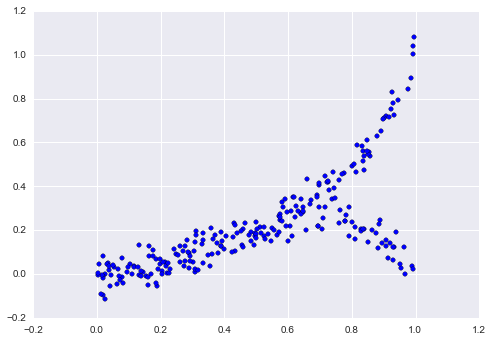

In [17]:
plt.scatter(X, Y);

In [4]:
m = OMGP(X, Y, K=2)
m.variance = 0.01
m.hyperparam_interval = 100  # Frequency of hyperparameter optimizations

print m.log_likelihood()

[[ 918.76173068]]


In [5]:
m

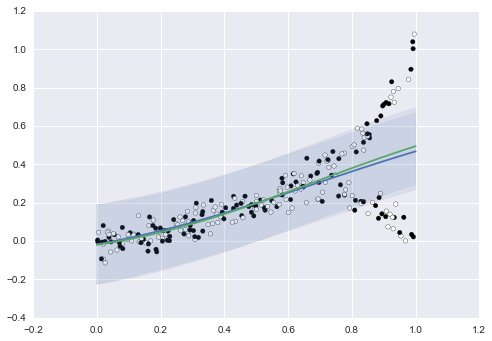

In [7]:
# Before optimization

XX = np.atleast_2d(np.linspace(0,1)).T

YY, YYv = m.predict_components(XX)

plt.scatter(m.X, m.Y, c=np.argmax(m.phi, 1));
for i in range(m.phi.shape[1]):
    plt.fill_between(XX[:, 0], YY[:, i] - 2 * np.sqrt(YYv[:, i]),
                               YY[:, i] + 2 * np.sqrt(YYv[:, i]),
                     alpha=0.1)
    plt.plot(XX, YY[:, i]);

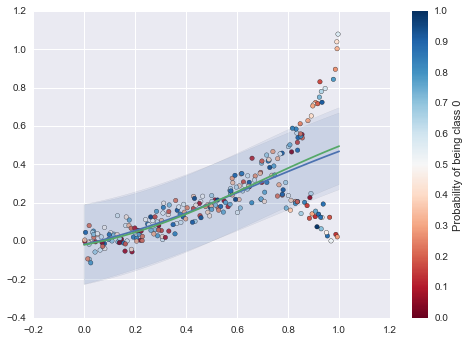

In [9]:
YY, YYv= m.predict_components(XX)

plt.scatter(m.X, m.Y, c=(m.phi[:,0]), cmap=cm.RdBu, vmin=0., vmax=1.);
cb = plt.colorbar()
cb.set_label('Probability of being class 0')
for i in range(m.phi.shape[1]):
    plt.fill_between(XX[:, 0], YY[:, i] - 2 * np.sqrt(YYv[:, i]),
                               YY[:, i] + 2 * np.sqrt(YYv[:, i]),
                     alpha=0.1)
    plt.plot(XX, YY[:, i]);

In [10]:
m.optimize(step_length=0.01, maxiter=250)

iteration 90 bound=[[ 1130.6855248]] grad=1.19648463384e-05, beta=0.818692569529 vb converged (ftol)
iteration 250 bound=[[ 1565.9876911]] grad=99.2117802766, beta=0.0 maxiter exceeded


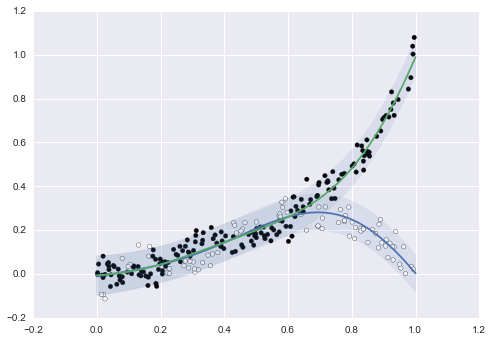

In [13]:
# After optimization

XX = np.atleast_2d(np.linspace(0,1)).T

YY, YYv = m.predict_components(XX)

plt.scatter(m.X, m.Y, c=np.argmax(m.phi, 1));
for i in range(m.phi.shape[1]):
    plt.fill_between(XX[:, 0], YY[:, i] - 2 * np.sqrt(YYv[:, i]),
                               YY[:, i] + 2 * np.sqrt(YYv[:, i]),
                     alpha=0.1)
    plt.plot(XX, YY[:, i]);

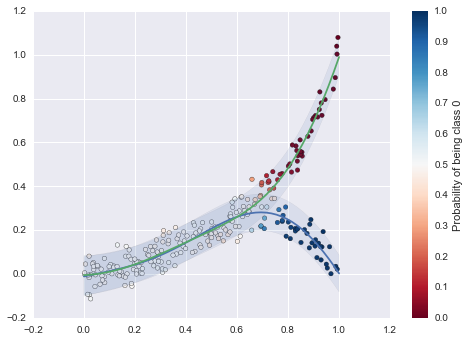

In [14]:
YY, YYv = m.predict_components(XX)

plt.scatter(m.X, m.Y, c=(m.phi[:,0]), cmap=cm.RdBu, vmin=0., vmax=1.);
cb = plt.colorbar()
cb.set_label('Probability of being class 0')
for i in range(m.phi.shape[1]):
    plt.fill_between(XX[:, 0], YY[:, i] - 2 * np.sqrt(YYv[:, i]),
                               YY[:, i] + 2 * np.sqrt(YYv[:, i]),
                     alpha=0.1)
    plt.plot(XX, YY[:, i]);

In [15]:
m

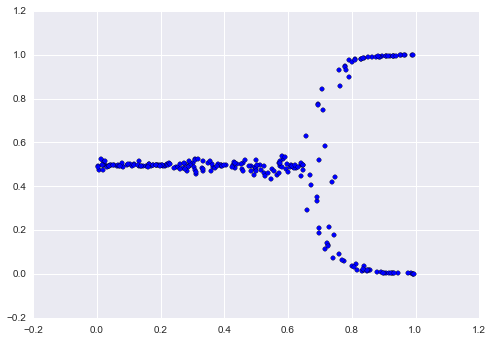

In [16]:
plt.scatter(m.X, m.phi[:,0]);